In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder


In [ ]:
# option d'affichage des résultats
#pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [ ]:
colonnes =["IDENT","TypeHabi", "GeoFaz_Scl", "GeoFaz_cl","Anciennete","Doublon_ligne",
            "Revenus_iris","Sexe","Prenom_Phase_scl_H", "Prenom_Phase_scl_F","Prenom_Phase_cl_H",
           "Prenom_Phase_cl_F","Age_H","Age_F","Pays_sud","Prenom_effectif","codif_RdB","Flag_PA",
           "Annee_1er_don","Cumul_dons","Don_max","Don_moyen","Vingtiles_ISF","IFI+"]

In [ ]:
data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,03,75,07,08,03,03,03,64,46,06,04,09,04,02,03,03,02,07,07,06,04,10,2
1,0000000201001512,01,74,07,05,03,03,04,65,81,06,08,11,12,02,04,03,02,08,05,02,02,10,2
2,0000000301002801,02,32,03,07,02,04,04,66,66,06,06,11,09,02,03,03,02,08,07,05,03,07,2
3,0000000401003186,01,12,01,04,03,07,03,51,81,05,08,09,12,02,05,01,02,02,07,08,06,18,2
4,0000000501003624,02,12,01,06,03,03,03,51,81,05,08,09,12,02,05,01,02,08,07,08,06,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,02,75,07,07,02,02,01,51,64,05,06,08,09,02,01,01,02,15,08,09,07,03,NaN
484518,0048451904239261,02,14,01,04,03,03,04,55,54,05,05,08,05,01,01,04,02,15,08,09,07,07,NaN
484519,0048452004239262,02,63,06,10,02,03,04,51,81,05,08,09,12,02,05,03,02,15,08,09,07,10,NaN
484520,0048452104239263,02,11,01,03,02,04,04,51,66,05,06,09,09,02,05,03,02,15,08,09,07,08,NaN


In [ ]:
data.describe()

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
count,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,465453
unique,484522,4,38,8,11,3,8,5,31,45,7,8,12,12,2,6,5,2,9,8,9,7,21,2
top,0005594402092972,02,72,07,06,03,03,01,71,81,07,08,12,12,02,05,02,02,01,04,06,02,15,2
freq,1,300217,39822,172697,125150,305709,121212,169127,182654,230666,182654,230666,182655,230666,472877,204249,222173,462970,117524,105242,86778,109209,34764,462833


In [ ]:
# connaitre les individus dont on n'a pas d'information sur la variable
data.iloc[:,23].value_counts(dropna = False)


2      462833
NaN     19069
1        2620
Name: IFI+, dtype: int64

In [ ]:
(data.isnull()).sum(axis=0)

IDENT                     0
TypeHabi                  0
GeoFaz_Scl                0
GeoFaz_cl                 0
Anciennete                0
Doublon_ligne             0
Revenus_iris              0
Sexe                      0
Prenom_Phase_scl_H        0
Prenom_Phase_scl_F        0
Prenom_Phase_cl_H         0
Prenom_Phase_cl_F         0
Age_H                     0
Age_F                     0
Pays_sud                  0
Prenom_effectif           0
codif_RdB                 0
Flag_PA                   0
Annee_1er_don             0
Cumul_dons                0
Don_max                   0
Don_moyen                 0
Vingtiles_ISF             0
IFI+                  19069
dtype: int64

In [ ]:
(data.isnull()).sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
484517    1
484518    1
484519    1
484520    1
484521    1
Length: 484522, dtype: int64

In [ ]:
# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

In [ ]:
#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

C:\Users\Christian\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Christian\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
data_sans_nan

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,3,75,7,8,3,3,3,64,46,6,4,9,4,2,3,3,2,7,7,6,4,10,2
1,0000000201001512,1,74,7,5,3,3,4,65,81,6,8,11,12,2,4,3,2,8,5,2,2,10,2
2,0000000301002801,2,32,3,7,2,4,4,66,66,6,6,11,9,2,3,3,2,8,7,5,3,7,2
3,0000000401003186,1,12,1,4,3,7,3,51,81,5,8,9,12,2,5,1,2,2,7,8,6,18,2
4,0000000501003624,2,12,1,6,3,3,3,51,81,5,8,9,12,2,5,1,2,8,7,8,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466512,0046651304217222,2,35,3,10,2,4,1,71,37,7,3,12,11,2,4,3,2,1,2,2,2,7,2
466513,0046651404217223,3,75,7,10,2,6,4,65,66,6,6,11,10,2,4,3,2,1,3,6,5,17,2
466514,0046651504217224,1,73,7,6,3,7,3,32,81,3,8,4,12,2,5,3,2,1,3,4,4,19,2
466515,0046651604217225,2,31,3,8,3,5,2,71,44,7,4,12,5,2,4,2,2,1,2,3,3,15,2


In [ ]:
data_sans_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465453 entries, 0 to 466516
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IDENT               465453 non-null  object
 1   TypeHabi            465453 non-null  int32 
 2   GeoFaz_Scl          465453 non-null  int32 
 3   GeoFaz_cl           465453 non-null  int32 
 4   Anciennete          465453 non-null  int32 
 5   Doublon_ligne       465453 non-null  int32 
 6   Revenus_iris        465453 non-null  int32 
 7   Sexe                465453 non-null  int32 
 8   Prenom_Phase_scl_H  465453 non-null  int32 
 9   Prenom_Phase_scl_F  465453 non-null  int32 
 10  Prenom_Phase_cl_H   465453 non-null  int32 
 11  Prenom_Phase_cl_F   465453 non-null  int32 
 12  Age_H               465453 non-null  int32 
 13  Age_F               465453 non-null  int32 
 14  Pays_sud            465453 non-null  int32 
 15  Prenom_effectif     465453 non-null  int32 
 16  co

In [ ]:
data_sans_nan.describe()

,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
count,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000
mean,1.869420,48.584830,4.533964,6.246605,2.605926,4.275798,2.536705,57.524141,68.414229,5.528803,6.530677,9.547428,9.864519,1.976184,4.103469,2.291338,1.953697,3.463510,3.610745,3.960802,3.232995,11.008207,1.994371
std,0.611073,22.762038,2.257467,2.267625,0.535912,1.690335,1.237929,14.446827,15.488192,1.477708,1.702904,2.771383,2.759177,0.152474,1.124122,0.859759,0.210141,2.310546,1.609919,2.199834,1.615739,5.260786,0.074815
min,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,3.000000,5.000000,2.000000,3.000000,1.000000,51.000000,64.000000,5.000000,6.000000,8.000000,8.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,2.000000
50%,2.000000,43.000000,4.000000,6.000000,3.000000,4.000000,3.000000,65.000000,75.000000,6.000000,7.000000,11.000000,11.000000,2.000000,4.000000,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,11.000000,2.000000
75%,2.000000,72.000000,7.000000,8.000000,3.000000,6.000000,4.000000,71.000000,81.000000,7.000000,8.000000,12.000000,12.000000,2.000000,5.000000,3.000000,2.000000,5.000000,5.000000,6.000000,4.000000,16.000000,2.000000
max,4.000000,81.000000,8.000000,11.000000,3.000000,8.000000,5.000000,71.000000,81.000000,7.000000,8.000000,12.000000,12.000000,2.000000,6.000000,5.000000,2.000000,8.000000,8.000000,9.000000,7.000000,21.000000,2.000000


In [ ]:
data_sans_nan["IFI+"].value_counts(dropna=False)

2    462833
1      2620
Name: IFI+, dtype: int64

In [ ]:
#sns.pairplot(data_sans_nan.iloc[:10000,1:],hue="IFI+",diag_kind={'bins' : 2} )

In [ ]:
# tableau de corrélation 
tableau_corr =data_sans_nan.iloc[:,1:23].corr()
tableau_corr

,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF
TypeHabi,1.000000,-0.260988,-0.266120,0.050414,-0.160545,-0.099983,0.077886,-0.051893,0.035199,-0.055548,0.036591,-0.039896,0.032674,0.006999,0.013695,-0.028809,0.009030,-0.020418,-0.025277,-0.016893,-0.012301,-0.126506
GeoFaz_Scl,-0.260988,1.000000,0.997084,-0.059682,0.090778,-0.007646,-0.105846,0.079703,-0.062413,0.083849,-0.065925,0.063969,-0.052414,-0.013892,-0.032601,0.028961,-0.022574,0.048771,0.066740,0.045941,0.032711,0.129988
GeoFaz_cl,-0.266120,0.997084,1.000000,-0.059178,0.096064,0.017440,-0.107365,0.079204,-0.063383,0.083580,-0.066709,0.062732,-0.054881,-0.015005,-0.032869,0.031072,-0.022690,0.049404,0.069949,0.050266,0.037016,0.147336
Anciennete,0.050414,-0.059682,-0.059178,1.000000,-0.049371,0.004910,0.063291,-0.017271,0.038505,-0.020398,0.038302,-0.002866,0.048742,0.011425,0.014264,-0.018492,0.010721,0.030494,0.007701,-0.009143,-0.011594,-0.033270
Doublon_ligne,-0.160545,0.090778,0.096064,-0.049371,1.000000,0.083338,-0.230956,0.110401,-0.008996,0.120739,-0.002572,0.078810,-0.048330,-0.014390,-0.012911,0.094638,0.004710,-0.069465,-0.056605,-0.017374,-0.002363,0.077789
Revenus_iris,-0.099983,-0.007646,0.017440,0.004910,0.083338,1.000000,-0.009514,-0.038426,-0.009660,-0.034219,-0.004626,-0.051484,-0.049639,-0.016270,0.002805,0.022315,-0.005008,0.018632,0.104741,0.138456,0.136942,0.828024
Sexe,0.077886,-0.105846,-0.107365,0.063291,-0.230956,-0.009514,1.000000,-0.612301,0.456977,-0.637117,0.488440,-0.574004,0.398991,0.020242,0.166921,-0.126943,0.012612,0.065665,0.044757,0.037223,0.029114,-0.021682
Prenom_Phase_scl_H,-0.051893,0.079703,0.079204,-0.017271,0.110401,-0.038426,-0.612301,1.000000,-0.389806,0.993330,-0.420542,0.901530,-0.332404,-0.021209,-0.063078,0.130713,-0.002472,0.009908,-0.049829,-0.085536,-0.088112,-0.024958
Prenom_Phase_scl_F,0.035199,-0.062413,-0.063383,0.038505,-0.008996,-0.009660,0.456977,-0.389806,1.000000,-0.410616,0.994767,-0.350378,0.684473,0.075194,0.194565,-0.152678,-0.006273,0.083493,0.108938,0.091886,0.077209,-0.017291
Prenom_Phase_cl_H,-0.055548,0.083849,0.083580,-0.020398,0.120739,-0.034219,-0.637117,0.993330,-0.410616,1.000000,-0.441743,0.908595,-0.346639,-0.022687,-0.038708,0.139899,-0.003039,0.007006,-0.050566,-0.084594,-0.086946,-0.020956


In [ ]:
# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j+1])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j+1])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i+1])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    

In [ ]:
# corrélations les plus importantes 
variables_corr(tableau_corr, seuil=0.95)

variable :  GeoFaz_Scl
corr pos ['GeoFaz_cl']
corr pos [1.0]

variable :  Prenom_Phase_scl_H
corr pos ['Prenom_Phase_cl_H']
corr pos [0.99]

variable :  Prenom_Phase_scl_F
corr pos ['Prenom_Phase_cl_F']
corr pos [0.99]



In [ ]:
# élimination des variables trop corrélées (choix manuel)
def elimination_val_corr(data):
    data = data.drop(columns=["GeoFaz_cl","Prenom_Phase_cl_H","Prenom_Phase_cl_F"])
    return data
  

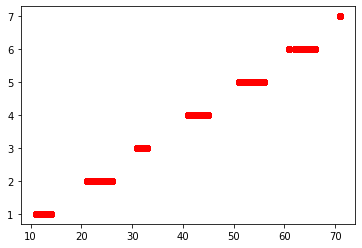

In [ ]:
# affichage de la corrélation entre deux variables
plt.plot(data_sans_nan["Prenom_Phase_scl_H"] ,data_sans_nan["Prenom_Phase_cl_H"] , 'ro', linestyle="None" )

In [ ]:
data_sans_nan.iloc[:,2]

0         75
1         74
2         32
3         12
4         12
          ..
466512    35
466513    75
466514    73
466515    31
466516    11
Name: GeoFaz_Scl, Length: 465453, dtype: int32

In [ ]:
# Comme il n'y a pas de valeurs manquantes, le seul traitement qu'on fait c'est tranformer
# le type de variable (les variables continues deviennent qualitatives)
def data_processing(df):
    """ 
    for i in range(0,len(df.columns)):    
        df[df.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(df.columns)):
        print(df[df.columns[i]].value_counts(dropna=False))    
    """
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]].astype('category')
    return df.to_numpy() #.as_matrix()


In [ ]:
data = data_sans_nan

In [ ]:
# numéro correspondant à la dernière colonne
nb_var = data.shape[1] - 1

# encodage Onehot
encodage = OneHotEncoder()  
encodage.fit(data_processing(data.iloc[:,1:nb_var]))  

#train_X = (encodage.transform(data_processing(data.iloc[:,1:nb_var])).toarray()).astype('float32')
### train_Y = np.asanyarray(data.iloc[:,nb_var]).astype('float32')

#input_size = train_X.shape[1] # ca sert pas ici
#train_Y[train_Y == 2.] = 0. # ligne inutile

OneHotEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV

In [ ]:

def evaluation(model, X_train, y_train, X_test, y_test, scoring):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("test set : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 
    print("train set : ")
    print(confusion_matrix(y_train, model.predict(X_train))) # ajouter 
    print(classification_report(y_train, model.predict(X_train) ))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4,shuffle=True, scoring = scoring, train_sizes = np.linspace(0.1, 1, 6) )
    print(N)
    print(train_score.mean(axis=1))
    plt.figure(figsize = (10,6))
    plt.plot(N, train_score.mean(axis=1), label ="train_score")
    plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")

    plt.legend()


In [ ]:
####################################################################################
#                                 PREMIERS TESTS
####################################################################################


In [ ]:
# base de données avec des variables corrélées et encodage OneHot
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X = (encodage.transform(data_processing(train_set.iloc[:,1:nb_var])).toarray()).astype('float32')
train_Y = np.asanyarray(train_set.iloc[:,nb_var]).astype('float32')

test_X = (encodage.transform(data_processing(test_set.iloc[:,1:nb_var])).toarray()).astype('float32')
test_Y = np.asanyarray(test_set.iloc[:,nb_var]).astype('float32')


In [ ]:
train_Y.shape

(372362,)

test set : 
[[  418    80]
 [10015 82578]]
              precision    recall  f1-score   support

         1.0       0.04      0.84      0.08       498
         2.0       1.00      0.89      0.94     92593

    accuracy                           0.89     93091
   macro avg       0.52      0.87      0.51     93091
weighted avg       0.99      0.89      0.94     93091

train set : 
[[  1821    301]
 [ 39899 330341]]
              precision    recall  f1-score   support

         1.0       0.04      0.86      0.08      2122
         2.0       1.00      0.89      0.94    370240

    accuracy                           0.89    372362
   macro avg       0.52      0.88      0.51    372362
weighted avg       0.99      0.89      0.94    372362

[ 27927  78195 128464 178733 229002 279271]
[0.95757194 0.89784977 0.87116106 0.86675232 0.86622935 0.86302367]


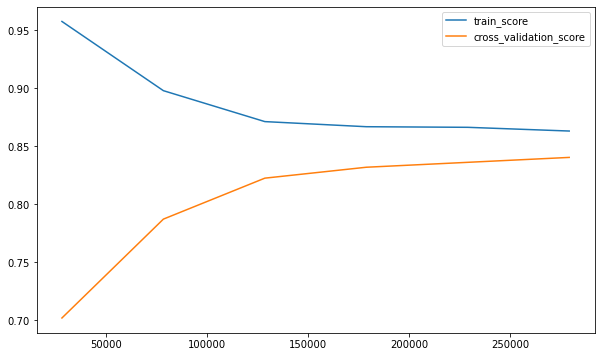

In [ ]:
model_17_cw = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced")
evaluation(model_17_cw, train_X, train_Y, test_X, test_Y, scoring="recall" )

In [ ]:
# base de données avec des variables corrélées et sans encodage OneHot

train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])

test set : 
[[  429    69]
 [14405 78188]]
              precision    recall  f1-score   support

           1       0.03      0.86      0.06       498
           2       1.00      0.84      0.92     92593

    accuracy                           0.84     93091
   macro avg       0.51      0.85      0.49     93091
weighted avg       0.99      0.84      0.91     93091

train set : 
[[  1868    254]
 [ 57674 312566]]
              precision    recall  f1-score   support

           1       0.03      0.88      0.06      2122
           2       1.00      0.84      0.92    370240

    accuracy                           0.84    372362
   macro avg       0.52      0.86      0.49    372362
weighted avg       0.99      0.84      0.91    372362

[ 27927  78195 128464 178733 229002 279271]
[0.87630107 0.87258921 0.87565908 0.8768682  0.87938358 0.87826013]


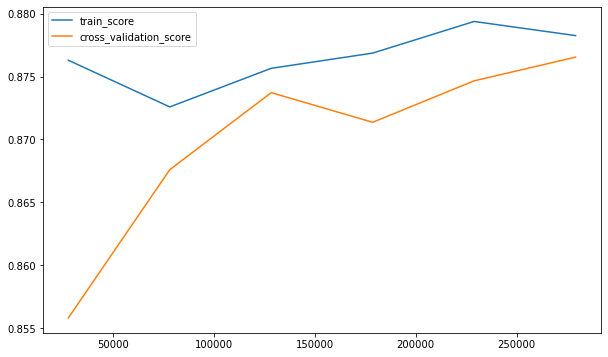

In [ ]:
model_17 = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )
evaluation(model_17, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring = "recall")

In [ ]:
####################################################################################
#                                FIN PREMIERS TESTS
####################################################################################

In [ ]:
#####################################################################################
#                                  PARAMETRAGE
#####################################################################################

In [ ]:
# PARAMETRAGE
# base de données avec des variables corrélées et sans encodage OneHot

train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.05,0.1,0.15,1,10,50], 'solver': ['liblinear','newton-cg', 'lbfgs']} #'penalty':['l2', 'none']

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0,solver= "liblinear", max_iter= 10000, class_weight="balanced" )

param = {'C':list(np.linspace(0.01,1,100,endpoint=False )) } #'penalty':['l2', 'none']

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

test set : 
[[  430    68]
 [14450 78143]]
              precision    recall  f1-score   support

           1       0.03      0.86      0.06       498
           2       1.00      0.84      0.92     92593

    accuracy                           0.84     93091
   macro avg       0.51      0.85      0.49     93091
weighted avg       0.99      0.84      0.91     93091

train set : 
[[  1871    251]
 [ 57921 312319]]
              precision    recall  f1-score   support

           1       0.03      0.88      0.06      2122
           2       1.00      0.84      0.91    370240

    accuracy                           0.84    372362
   macro avg       0.52      0.86      0.49    372362
weighted avg       0.99      0.84      0.91    372362

[ 27927  78195 128464 178733 229002 279271]
[0.87939767 0.88559828 0.87813184 0.87835069 0.87854373 0.87951711]


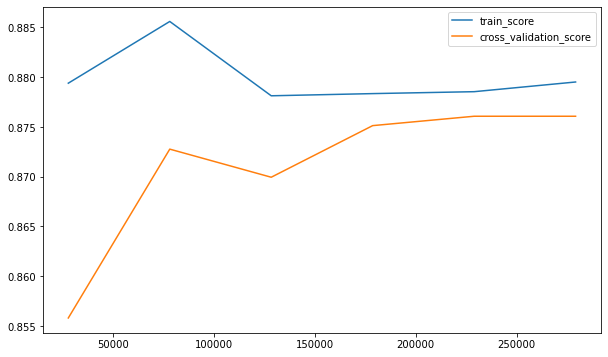

In [ ]:
final_model_reg_logistic = LogisticRegression(random_state = 0, max_iter = 10000, class_weight  = "balanced", 
                                             C=0.1486, solver="liblinear")
evaluation(final_model_reg_logistic, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring = "recall") 

In [ ]:
#####################################################################################
####################################################################################

In [ ]:
# PARAMETRAGE
# base de données sans variables corrélées et sans encodage Onehot

data_non_corr = elimination_val_corr(data)
nb_var = data_non_corr.shape[1] - 1

train_set, test_set = train_test_split(data_non_corr, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])



In [ ]:
# Premier paramétrage
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.05,0.1,0.15,1,10,50], 'solver': ['liblinear','newton-cg', 'lbfgs']} #'penalty':['l2', 'none']

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

test set : 
[[  431    67]
 [14897 77696]]
              precision    recall  f1-score   support

           1       0.03      0.87      0.05       498
           2       1.00      0.84      0.91     92593

    accuracy                           0.84     93091
   macro avg       0.51      0.85      0.48     93091
weighted avg       0.99      0.84      0.91     93091

train set : 
[[  1869    253]
 [ 59540 310700]]
              precision    recall  f1-score   support

           1       0.03      0.88      0.06      2122
           2       1.00      0.84      0.91    370240

    accuracy                           0.84    372362
   macro avg       0.51      0.86      0.49    372362
weighted avg       0.99      0.84      0.91    372362

[ 27927  78195 128464 178733 229002 279271]
[0.90619736 0.89082991 0.88691449 0.8840173  0.88304526 0.88155955]


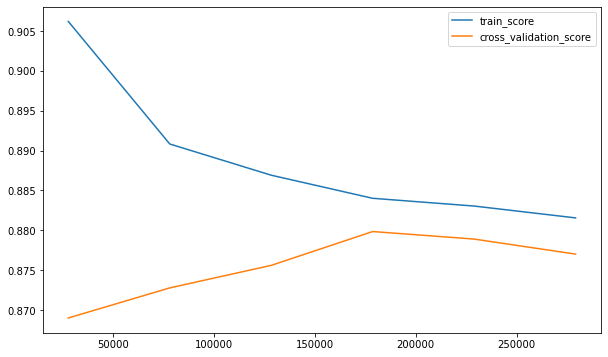

In [ ]:
model_17 = LogisticRegression(solver= "liblinear",C = 0.01, random_state =0, max_iter= 10000, class_weight="balanced" )
evaluation(model_17, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring = "recall")

In [ ]:
# Second paramétrage
model_reg_logistic = LogisticRegression(penalty='none', random_state =0, max_iter= 10000, class_weight="balanced" )

param = { 'solver': ['newton-cg', 'lbfgs']} #'penalty':['l2', 'none']

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


test set : 
[[  429    69]
 [14441 78152]]
              precision    recall  f1-score   support

           1       0.03      0.86      0.06       498
           2       1.00      0.84      0.92     92593

    accuracy                           0.84     93091
   macro avg       0.51      0.85      0.49     93091
weighted avg       0.99      0.84      0.91     93091

train set : 
[[  1866    256]
 [ 57732 312508]]
              precision    recall  f1-score   support

           1       0.03      0.88      0.06      2122
           2       1.00      0.84      0.92    370240

    accuracy                           0.84    372362
   macro avg       0.52      0.86      0.49    372362
weighted avg       0.99      0.84      0.91    372362



C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[ 27927  78195 128464 178733 229002 279271]
[0.8968944  0.88028801 0.87746108 0.87722526 0.87648519 0.8781028 ]


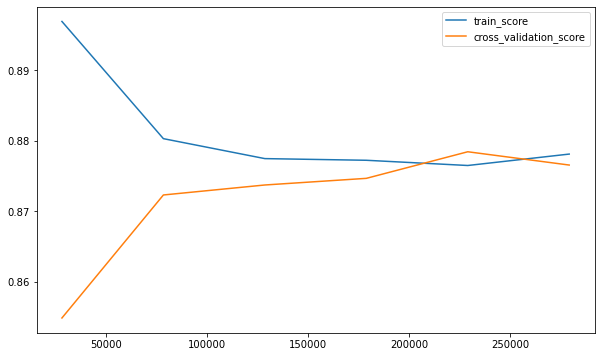

In [ ]:
model_17 = LogisticRegression(solver= "newton-cg", penalty ="none", random_state =0, max_iter= 10000, class_weight="balanced" )
evaluation(model_17, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring = "recall")

In [ ]:
###########################################################
#
#   SANS LES VARIABLES DONS
#
###########################################################

In [ ]:
#############################################################################################
#
#                                 DATA AUGMENTATION
#
#############################################################################################

In [ ]:
# PARAMETRAGE
# base de données avec des variables corrélées et sans encodage OneHot
nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0)

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy() # sans prendre en compte les identifiants
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])

In [ ]:
import imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [ ]:
# resample2 = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) 
#!pip install imblearn
#tl = TomekLinks(sampling_strategy='majority')
#X_resampled, y_resampled = tl.fit_resample(train_X_s[:,:22] , train_Y_s ) 

In [ ]:
# augmentation des données
tl = SMOTE()
X_resampled, y_resampled = tl.fit_resample(train_X_s[:,:22] , train_Y_s ) 


In [ ]:
print(np.unique(y_resampled, return_counts=True) )
np.unique(train_Y_s, return_counts = True)


(array([1, 2]), array([370240, 370240], dtype=int64))


(array([1, 2]), array([  2122, 370240], dtype=int64))

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000 )

param = {'solver': ['newton-cg','lbfgs', 'saga'],
         'penalty':["none"] }

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='f1' )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
resultat_reg_logistic.best_params_

{'penalty': 'none', 'solver': 'lbfgs'}

test set : 
[[  408    90]
 [13280 79313]]
              precision    recall  f1-score   support

           1       0.03      0.82      0.06       498
           2       1.00      0.86      0.92     92593

    accuracy                           0.86     93091
   macro avg       0.51      0.84      0.49     93091
weighted avg       0.99      0.86      0.92     93091

train set : 
[[331218  39022]
 [ 52598 317642]]
              precision    recall  f1-score   support

           1       0.86      0.89      0.88    370240
           2       0.89      0.86      0.87    370240

    accuracy                           0.88    740480
   macro avg       0.88      0.88      0.88    740480
weighted avg       0.88      0.88      0.88    740480

[ 55536 155500 255465 355430 455395 555360]
[0.87803561 0.87829687 0.87840553 0.87866603 0.87879788 0.87850278]


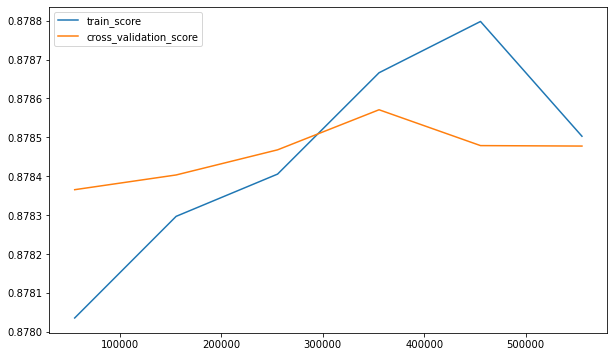

In [ ]:
model_17 = LogisticRegression(solver= "lbfgs",penalty="none", random_state =0, max_iter= 10000 )
evaluation(model_17, X_resampled, y_resampled, test_X_s, test_Y_s, scoring = "f1")

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000 )

param = {'solver': ["liblinear"],
         'C': [0.00001, 0.0001,0.001,0.01, 0.1, 1 ] }

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='f1' )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
resultat_reg_logistic.best_params_

{'C': 0.001, 'solver': 'liblinear'}

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000 )

param = {'solver': ["liblinear"],
         'C': [0.00095, 0.001,0.0015,0.0020 ] }

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='f1' )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
resultat_reg_logistic.best_params_

{'C': 0.00095, 'solver': 'liblinear'}

test set : 
[[  412    86]
 [13273 79320]]
              precision    recall  f1-score   support

           1       0.03      0.83      0.06       498
           2       1.00      0.86      0.92     92593

    accuracy                           0.86     93091
   macro avg       0.51      0.84      0.49     93091
weighted avg       0.99      0.86      0.92     93091

train set : 
[[331461  38779]
 [ 52610 317630]]
              precision    recall  f1-score   support

           1       0.86      0.90      0.88    370240
           2       0.89      0.86      0.87    370240

    accuracy                           0.88    740480
   macro avg       0.88      0.88      0.88    740480
weighted avg       0.88      0.88      0.88    740480

[ 55536 155500 255465 355430 455395 555360]
[0.87695299 0.87832578 0.87878501 0.87892567 0.87906596 0.87899752]


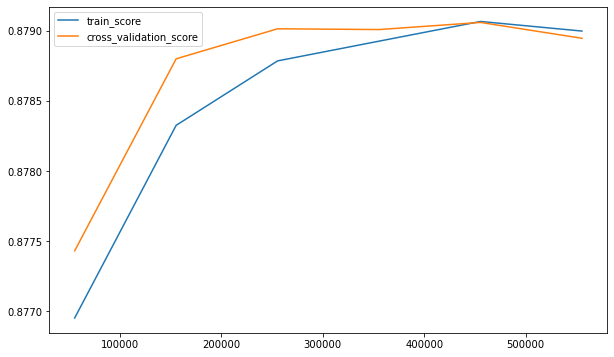

In [ ]:
model_17 = LogisticRegression(solver= "liblinear",C = 0.00095, random_state =0, max_iter= 10000 )
evaluation(model_17, X_resampled, y_resampled, test_X_s, test_Y_s, scoring = "f1")

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000)

param = {'C':[0.01,0.05,0.1,0.15,1,10,50], 'solver': ['newton-cg', 'lbfgs'],
         'penalty':['l2'] }

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
resultat_reg_logistic.best_params_

C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\util

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:

model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000)

param = {'C':[0.9,0.95,1,1.05,1.1], 'solver': ['lbfgs'], 'penalty': ['l2'] }

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
resultat_reg_logistic.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

test set : 
[[  408    90]
 [13291 79302]]
              precision    recall  f1-score   support

           1       0.03      0.82      0.06       498
           2       1.00      0.86      0.92     92593

    accuracy                           0.86     93091
   macro avg       0.51      0.84      0.49     93091
weighted avg       0.99      0.86      0.92     93091

train set : 
[[331212  39028]
 [ 52593 317647]]
              precision    recall  f1-score   support

           1       0.86      0.89      0.88    370240
           2       0.89      0.86      0.87    370240

    accuracy                           0.88    740480
   macro avg       0.88      0.88      0.88    740480
weighted avg       0.88      0.88      0.88    740480

[ 55536 155500 255465 355430 455395 555360]
[0.8788361  0.87859028 0.87848676 0.87854719 0.87851988 0.8784988 ]


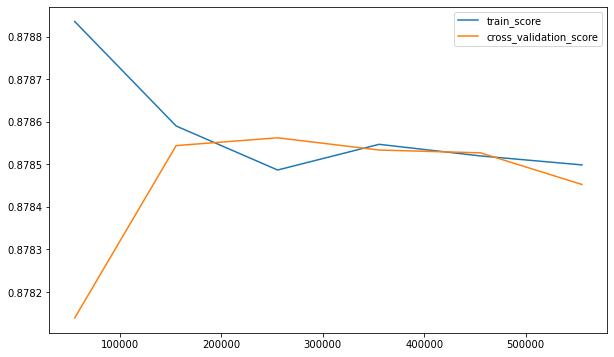

In [ ]:
model_17 = LogisticRegression(solver= "lbfgs", C = 1,penalty = "l2" , random_state = 0, max_iter= 10000 )
evaluation(model_17, X_resampled, y_resampled, test_X_s, test_Y_s, scoring = "f1")

In [ ]:
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000 )

param = {'C':[0.01,0.05,0.1,0.5,1,1.5,2], 'solver': ['liblinear', 'saga'],
         'penalty':['l1']}

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(X_resampled, y_resampled)
resultat_reg_logistic.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

test set : 
[[  408    90]
 [13288 79305]]
              precision    recall  f1-score   support

           1       0.03      0.82      0.06       498
           2       1.00      0.86      0.92     92593

    accuracy                           0.86     93091
   macro avg       0.51      0.84      0.49     93091
weighted avg       0.99      0.86      0.92     93091

train set : 
[[331277  38963]
 [ 52628 317612]]
              precision    recall  f1-score   support

           1       0.86      0.89      0.88    370240
           2       0.89      0.86      0.87    370240

    accuracy                           0.88    740480
   macro avg       0.88      0.88      0.88    740480
weighted avg       0.88      0.88      0.88    740480

[ 55536 155500 255465 355430 455395 555360]
[0.87866983 0.87864281 0.87859331 0.87856501 0.87867404 0.87866714]


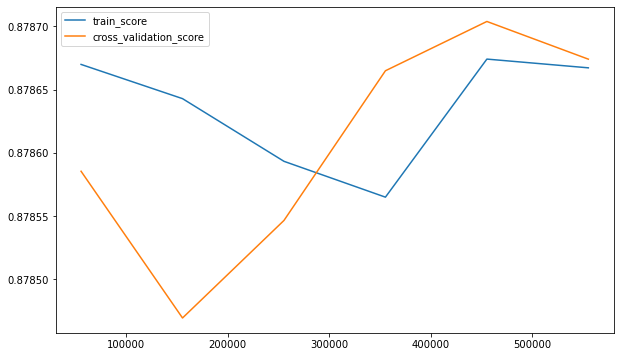

In [ ]:
model_17 = LogisticRegression(solver= "saga", C = 0.01,penalty = "l1", random_state = 0, max_iter= 10000 )
evaluation(model_17, X_resampled, y_resampled, test_X_s, test_Y_s, scoring = "f1")

In [ ]:
#####################################################################################
####################################################################################

In [ ]:
# il nous faut toutes les variables (*,24)
data.shape

(465453, 20)

In [ ]:
# on élimine les variables dons
data=data.drop(["Annee_1er_don", "Cumul_dons","Don_max", "Don_moyen"],axis=1)

In [ ]:
# PARAMETRAGE
# base de données avec des variables corrélées et sans encodage OneHot
nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0)

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy() # sans prendre en compte les identifiants
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])



In [ ]:
# Premier paramétrage
model_reg_logistic = LogisticRegression(random_state =0, max_iter= 10000, class_weight="balanced" )

param = {'C':[0.01,0.05,0.1,0.15,1,10,50], 'solver': ['liblinear','newton-cg', 'lbfgs']} #'penalty':['l2', 'none']

grid_reg_logistic = GridSearchCV(model_reg_logistic, param_grid = param, cv=5, scoring ='recall' )
resultat_reg_logistic = grid_reg_logistic.fit(train_X_s, train_Y_s)
resultat_reg_logistic.best_params_

C:\Users\Christian\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


{'C': 0.01, 'solver': 'liblinear'}

test set : 
[[  342   156]
 [29264 63329]]
              precision    recall  f1-score   support

           1       0.01      0.69      0.02       498
           2       1.00      0.68      0.81     92593

    accuracy                           0.68     93091
   macro avg       0.50      0.69      0.42     93091
weighted avg       0.99      0.68      0.81     93091

train set : 
[[  1452    670]
 [117042 253198]]
              precision    recall  f1-score   support

           1       0.01      0.68      0.02      2122
           2       1.00      0.68      0.81    370240

    accuracy                           0.68    372362
   macro avg       0.50      0.68      0.42    372362
weighted avg       0.99      0.68      0.81    372362

[ 27927  78195 128464 178733 229002 279271]
[0.72067408 0.70205963 0.69005457 0.69035879 0.68988017 0.68551717]


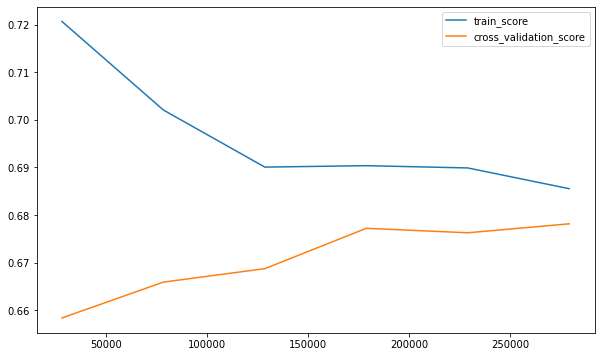

In [ ]:
final_model_reg_logistic = LogisticRegression(random_state = 0, max_iter = 10000, class_weight  = "balanced", 
                                             C=0.01, solver="liblinear")
evaluation(final_model_reg_logistic, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring = "recall") 

(465453, 20)

In [ ]:
#####################################################################################
####################################################################################
####################################################################################
####################################################################################

In [ ]:
data_1 = data_non_corr[data_non_corr["IFI+"]==1]
data_2 = data_non_corr[data_non_corr["IFI+"]==2]

In [ ]:

probas = model_17.predict_proba( data_non_corr.iloc[:,1:nb_var] ) # *1000 data_1
#Création des quarantiles
d = {'id': data_non_corr.iloc[:,0] , 'proba': probas[:,0]} # data_1
df = pd.DataFrame(data=d)
df.to_excel("C:/Users/Christian/Desktop/test_test.xlsx") 



In [ ]:
df

In [ ]:
somme_quarantiles = pd.DataFrame(data ="-", index=["somme"], columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )


In [ ]:
info_quarantiles = pd.DataFrame(data ="-", index=range(40), columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )


In [ ]:
# prendre uniquement les probalités supérieurs à 50

def remplissage_score_1(probas, taux):

    somme_quarantiles = pd.DataFrame(data ="", index=["somme"], columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )
    info_quarantiles = pd.DataFrame(data ="", index=range(40), columns = ["Tranches de Score","Zone","Eff.", "Pourc.", "Pourc. cumulé"] )

    num = 0
    somme_cum = 0
    dim_qua = info_quarantiles.shape[0]
    val_max = max(probas[:,0])
    val_inter = val_max/40
    val_change = 0

    for k in range(dim_qua) :   
        if k == (dim_qua-1) : 
            somme = ((val_change <=probas[:,0]) & (probas[:,0]<= val_change + val_inter)).sum()
        else :
            somme = ((val_change <=probas[:,0]) & (probas[:,0]< val_change + val_inter)).sum()
            
        if k < (dim_qua/2 - (4+1)) : 
            info_quarantiles.iloc[k,1] = 'R'
        elif k > (dim_qua/2 -(1) ) :
            info_quarantiles.iloc[k,1] = 'V'
        else:
            info_quarantiles.iloc[k,1] = '-'
            
        if k == 0:
            info_quarantiles.iloc[k,0] = str(num)+" - "+str(num+25)
        else :
            info_quarantiles.iloc[k,0] = str(num+1)+" - "+str(num+25)
        
        info_quarantiles.iloc[k,2] = somme
        info_quarantiles.iloc[k,3] = round(somme/probas.shape[0],2)

        somme_cum = somme_cum + info_quarantiles.iloc[k,3]

        info_quarantiles.iloc[k,4] = somme_cum
        num = num + 25
        val_change = val_change + val_inter

    somme_quarantiles.iloc[0,0] = "Ensemble"    
    somme_quarantiles.iloc[0,2] = info_quarantiles.iloc[:,2].sum()
    somme_quarantiles.iloc[0,3] = info_quarantiles.iloc[:,3].sum()
    somme_quarantiles.iloc[0,4] = info_quarantiles.iloc[39,4]

    return info_quarantiles.append(somme_quarantiles)

    
    

In [ ]:
remplissage_score_1(probas, taux=4)


In [ ]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

In [ ]:
data_orig

In [ ]:
for i in range(1,data_orig.shape[1]): #data_non_corr
    print(data_orig.iloc[:,i].value_counts() )
    
       

In [ ]:
data_non_corr

In [ ]:
model_17.predict_proba(test_X_s)[:,0]*1000

In [ ]:
np.unique(model_17.predict(test_X_s), return_counts=True)

In [ ]:
(model_17.predict_proba(test_X_s)[:,0]>0.5).sum()

In [ ]:
0.7115506+0.2884494 

In [ ]:
92593/498

In [ ]:
370240/2122

In [ ]:
#####################################################################################
####################################################################################

In [ ]:
from scipy.stats import kstest


In [ ]:
test_stat = kstest(x, 'norm')

In [ ]:
np.linspace(0.01,1,100,endpoint=False )

In [ ]:
range(0,1,100)

In [ ]:
462833/465453 

In [ ]:
2620/465453

In [ ]:
462833/2620

In [ ]:
custom_metric(np.array([0,0,0,0,0,0,0,0,0,0,1]),np.array([1,1,1,1,1,1,0,0,0,0,1]))

In [ ]:
custom_metric(np.array([0,0,0,0,0,0,1]),np.array([0,0,0,0,1,1,1]))

In [ ]:
np.linspace(0.1, 1, 10)

In [ ]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [ ]:
X

In [ ]:
y.shape